## TODO:
* when eta is high, the battery will charge and discharge more often. This leads to alot of dots in the 2nd figure. 
* run code for 2 setups with high (realistic) and low eta

In [3]:
%load_ext autoreload
%autoreload 2
from tools import EnergyStorageModel

In [4]:
import numpy as np
# how do align 

## ETA HIGH

In [32]:
# Example Usage:
model = EnergyStorageModel(eta_charge=0.98, 
                           eta_discharge=0.97, 
                           beta = 0.99,
                           a_bar = 4,
                           num_storage_levels=20,
                           num_actions=21,
                           num_price_levels=10,
                           simulate_prices = True,
                           tolerance = 1e-2,
                           max_iteration=10_000)


Simulating price series...


heya
Converged in 704 iterations.


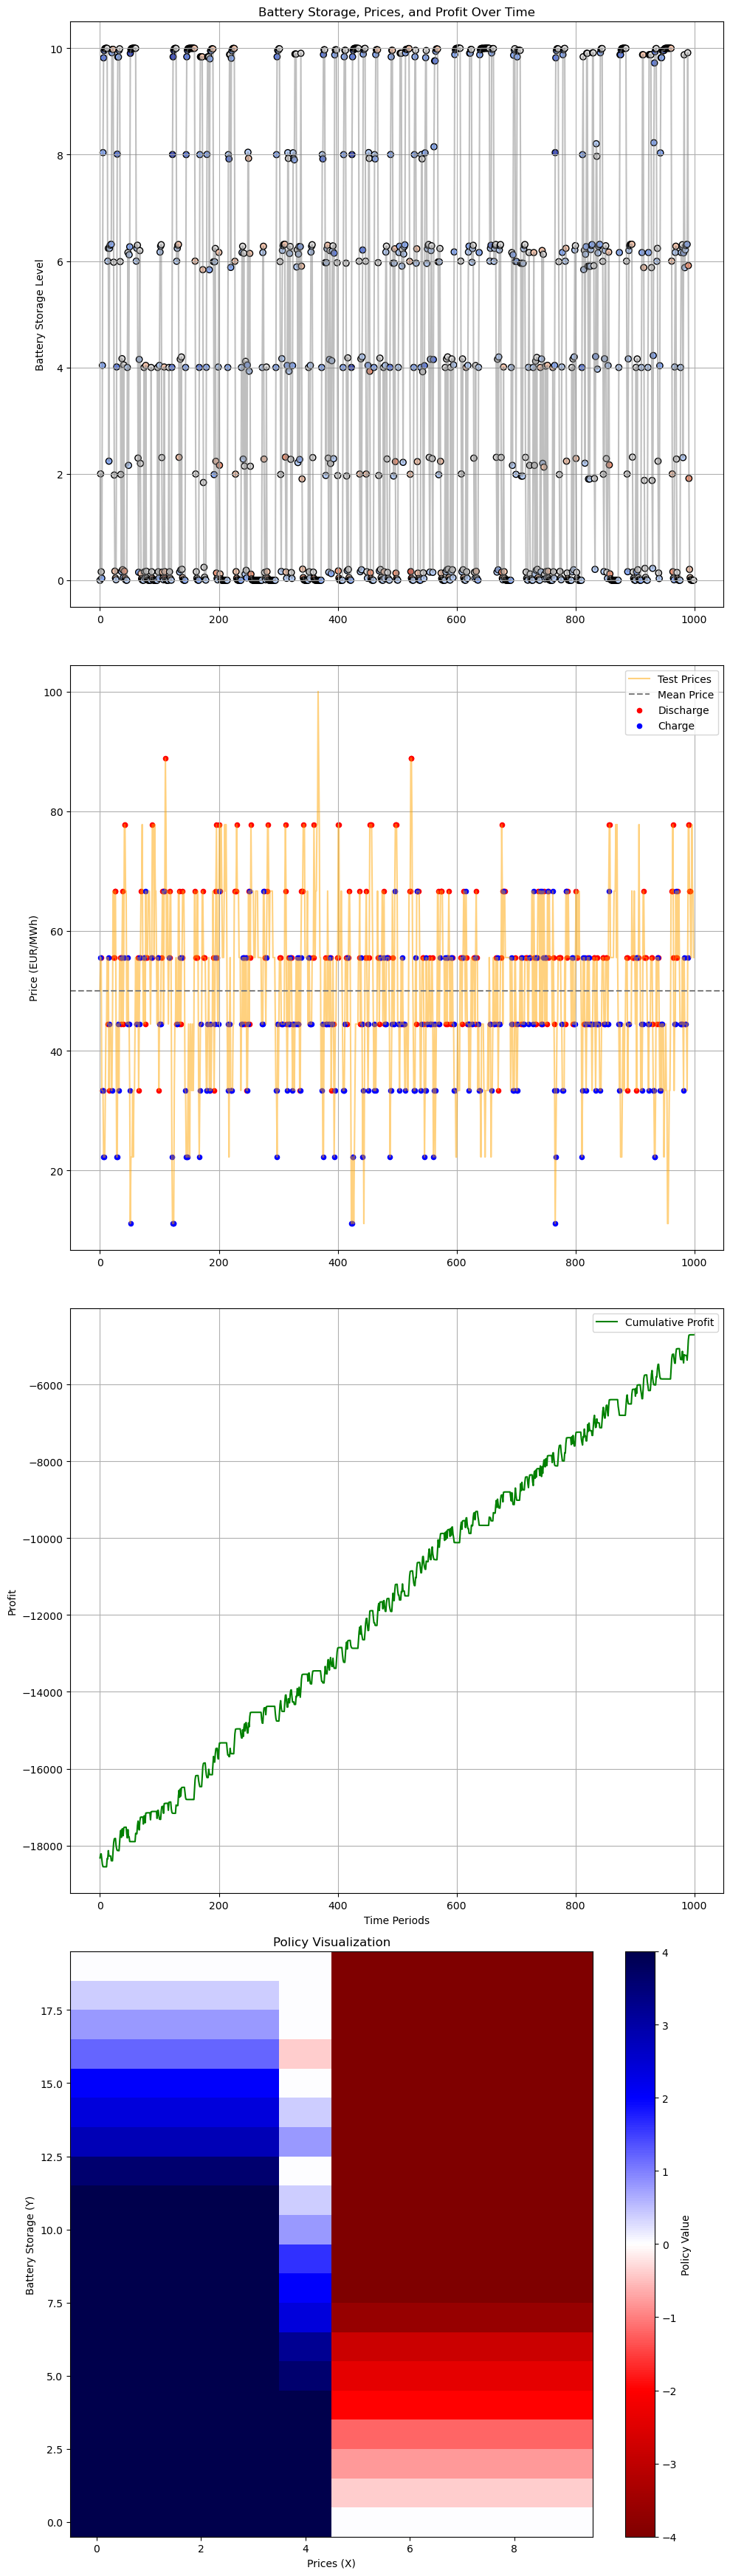

In [33]:
v2, p2 = model.vfi_vec()
battery_storage_sim, profit_sim = model.simulate()
model.plot_results(battery_storage_sim, profit_sim)

Simulating price series...
heya
Converged in 71969 iterations.


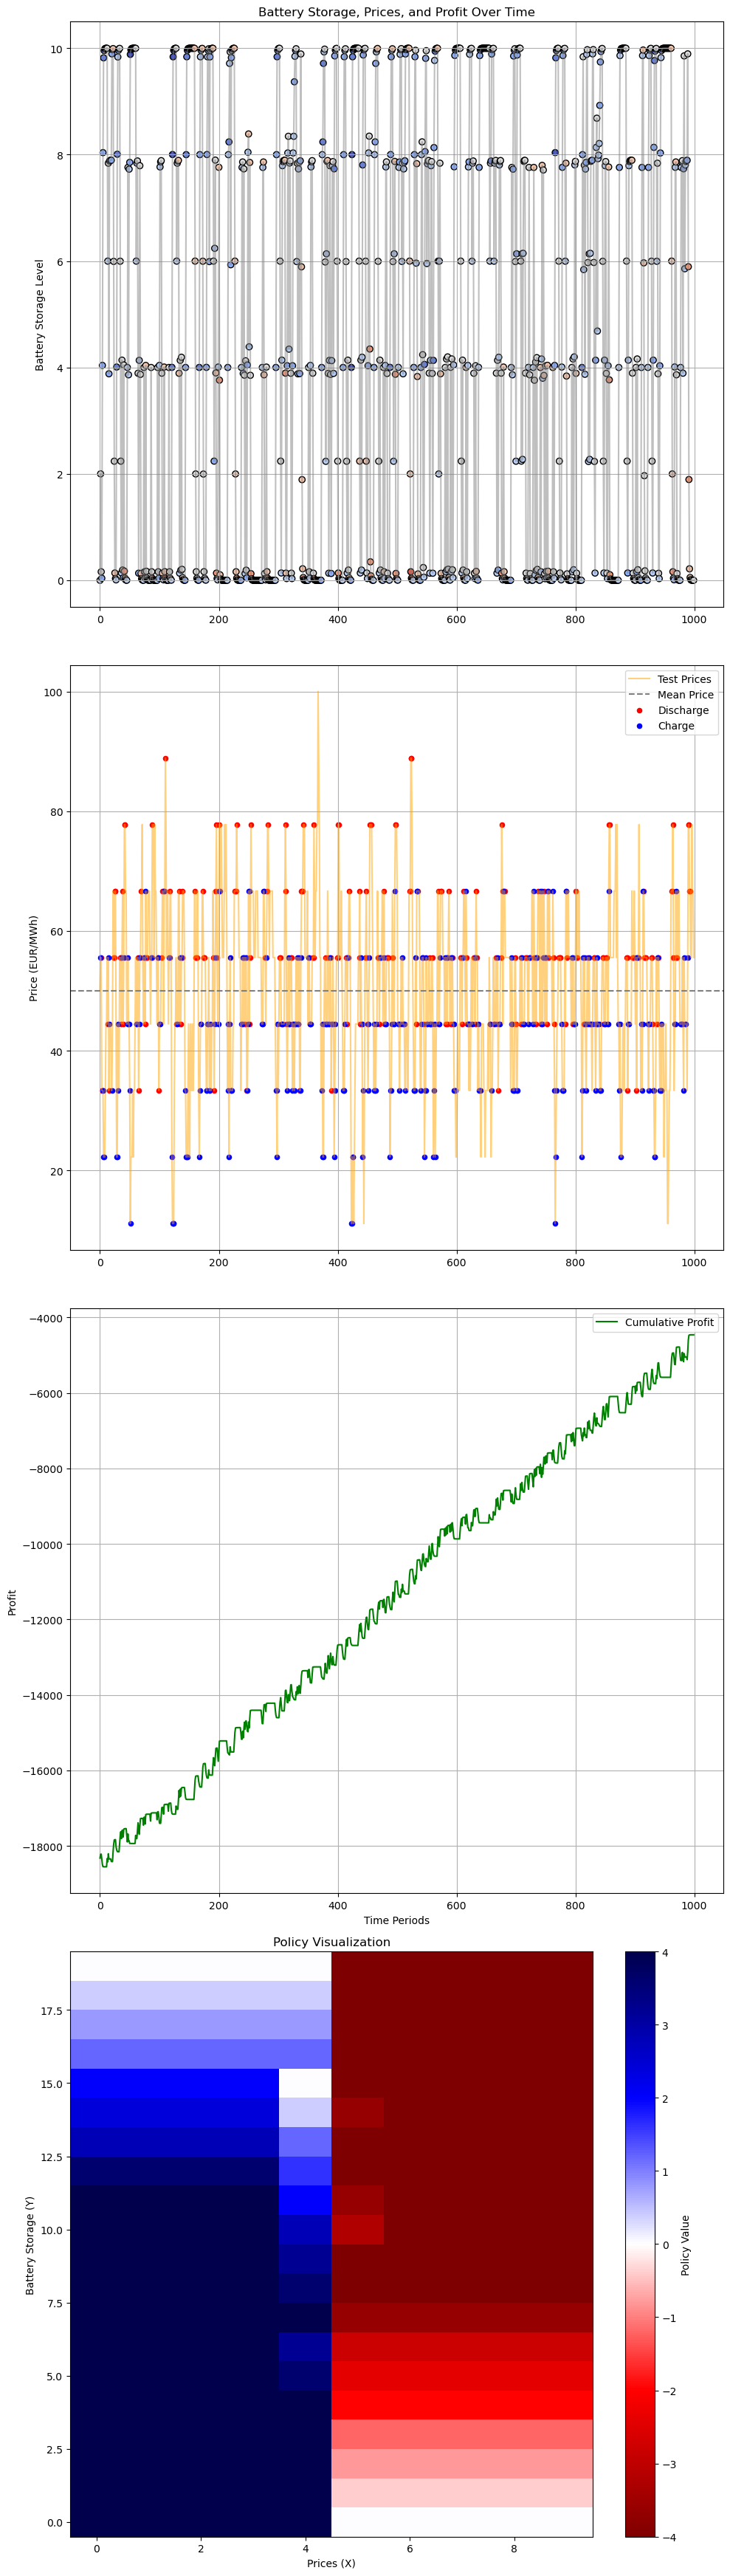

In [31]:
model = EnergyStorageModel(eta_charge=0.98, 
                           eta_discharge=0.97, 
                           beta = 0.9999,
                           a_bar = 4,
                           num_storage_levels=20,
                           num_actions=21,
                           num_price_levels=10,
                           simulate_prices = True,
                           tolerance = 1e-2,
                           max_iteration=100_000)
v1, p1 = model.vfi_vec()
battery_storage_sim, profit_sim = model.simulate()
model.plot_results(battery_storage_sim, profit_sim)

In [ ]:
n

False

In [ ]:
print(np.allclose(p1,p2))
p1-p2

True


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
print(np.allclose(v1,v2))
v1-v2

True


array([[4.54747351e-13, 4.54747351e-13, 6.82121026e-13, 6.82121026e-13,
        6.82121026e-13, 6.82121026e-13, 4.54747351e-13, 4.54747351e-13,
        4.54747351e-13, 6.82121026e-13],
       [6.82121026e-13, 4.54747351e-13, 6.82121026e-13, 4.54747351e-13,
        4.54747351e-13, 6.82121026e-13, 4.54747351e-13, 6.82121026e-13,
        6.82121026e-13, 4.54747351e-13],
       [6.82121026e-13, 4.54747351e-13, 9.09494702e-13, 6.82121026e-13,
        6.82121026e-13, 4.54747351e-13, 2.27373675e-13, 6.82121026e-13,
        4.54747351e-13, 4.54747351e-13],
       [4.54747351e-13, 6.82121026e-13, 6.82121026e-13, 4.54747351e-13,
        4.54747351e-13, 6.82121026e-13, 9.09494702e-13, 6.82121026e-13,
        9.09494702e-13, 4.54747351e-13],
       [4.54747351e-13, 2.27373675e-13, 2.27373675e-13, 4.54747351e-13,
        4.54747351e-13, 6.82121026e-13, 4.54747351e-13, 6.82121026e-13,
        9.09494702e-13, 6.82121026e-13],
       [4.54747351e-13, 2.27373675e-13, 6.82121026e-13, 4.54747351e-13,
   

## ETA LO

In [ ]:
model_2 = EnergyStorageModel(price_data_path='../data/entsoe_price_DK_1_20150101_20240101.csv',
                             eta_charge=0.85,
                             eta_discharge=0.85,
                             num_actions=13)
model_2.compute_price_transitions()
V2, P2 = model_2.value_function_iteration()
battery_storage_sim, profit_sim = model_2.simulate()
model_2.plot_results(battery_storage_sim, profit_sim)
